Bu çalışmada oversampling ve undersampling uygulanarak CNN modeli train ve tese tabi tutulmuştur.

In [52]:
# Undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, OneSidedSelection,EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE

from matplotlib import pyplot
from numpy import where
import numpy as np
from numpy import mean
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from visual_callbacks import AccLossPlotter,  ConfusionMatrixPlotter

In [53]:
# load dataset
dataframe = pd.read_csv("KidneyStoneDataset.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:5120]
Y = dataset[:,5120]
#verileri normalize etmesem de sonuç değişmiyor
normalized_X = preprocessing.normalize(X) 
print(normalized_X)
print(Y)
print(X.shape)

[[7.13e-04 1.07e-03 1.19e-03 ... 1.45e-02 1.60e-02 1.27e-02]
 [7.80e-04 7.80e-04 7.80e-04 ... 1.34e-03 5.57e-04 2.23e-04]
 [4.57e-04 3.48e-03 9.69e-03 ... 9.15e-05 9.15e-05 0.00e+00]
 ...
 [1.10e-02 1.14e-02 1.61e-02 ... 6.32e-03 6.65e-03 8.60e-03]
 [3.76e-03 4.77e-03 5.21e-03 ... 7.67e-03 6.37e-03 5.35e-03]
 [1.16e-02 4.15e-03 2.08e-03 ... 1.77e-02 1.78e-02 1.80e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(221, 5120)


In [62]:
X = np.array(normalized_X) 
y = np.array(Y)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
#over = SMOTE(sampling_strategy=0.3)
#under = RandomUnderSampler(sampling_strategy=0.6)
over=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
#over = RandomOverSampler(sampling_strategy=0.3)
#undersample = EditedNearestNeighbours(n_neighbors=2)
#undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=300)
#undersample = TomekLinks()
X, y=over.fit_resample(X,y)
#X, y = under.fit_resample(X, y)


counter = Counter(y)
print(counter)

Counter({1: 182, 0: 39})
Counter({1: 182, 0: 173})


In [63]:
model=Sequential()
model.add(Dense(32,input_dim=5120))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax'))

class_names = ['Healthy', 'Patient']
#plotter = ConfusionMatrixPlotter(X_val=X_test, classes=class_names, Y_val=y_test)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [64]:
def plot_confusion_matrix(cm, names,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

train (%) 0.5140845070422535 	 test(%): 0.5070422535211268
train (%) 0.5140845070422535 	 test(%): 0.5070422535211268
train (%) 0.5140845070422535 	 test(%): 0.5070422535211268
train (%) 0.5105633802816901 	 test(%): 0.5211267605633803
train (%) 0.5105633802816901 	 test(%): 0.5211267605633803
Precision: 0.513
Recall: 1.000
F1 Score: 0.678
Confusion matrix
[[  0 173]
 [  0 182]]


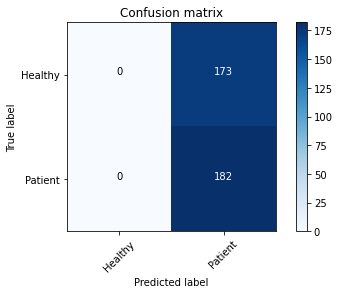

In [65]:
n_splits=5
#split sayısı doğruluğu değiştirmiyor.
skf = StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=True)
skf.get_n_splits(X, y)
cm=0
precision=0
recall=0
f1=0
for train_index, test_index in skf.split(X, y):
    # print(f"train {np.sum(train_index)} \t test: {np.sum(test_index)}") #check split index
    print(f"train (%) {np.sum(y[train_index])/len(train_index)} \t test(%): {np.sum(y[test_index])/len(test_index)}")
    cnn=model.fit(X[train_index,:], y[train_index], \
                  validation_data=(X[test_index,:], \
                  y[test_index]), epochs=100,batch_size=32, verbose=0)
    pred=model.predict(X[test_index,:])
    precision = precision+ precision_score(y[test_index], pred)
    recall = recall+ recall_score(y[test_index], pred)
    f1=f1+f1_score(y[test_index],pred)
    cm =cm + confusion_matrix(y[test_index], pred)
    pred = np.argmax(pred,axis=1)
# Compute confusion matrix
precision=precision/n_splits
print('Precision: %.3f' % precision)
recall=recall/n_splits
print('Recall: %.3f' % recall)
f1=f1/n_splits
print('F1 Score: %.3f' % f1)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)

In [66]:
train_accuracy=0
test_accuracy=0
precision=0
recall=0
f1=0

for train_index, test_index in skf.split(X, y):
    train_preds = np.where(model.predict(X[train_index,:]) > 0.5, 1, 0)
    test_preds = np.where(model.predict(X[test_index,:]) > 0.5, 1, 0)
    train_accuracy = train_accuracy+accuracy_score(y[train_index], train_preds)
    test_accuracy =test_accuracy+ accuracy_score(y[test_index], test_preds)
    precision=precision+precision_score(y[test_index], test_preds)
    recall=recall+recall_score(y[test_index], test_preds)
    f1=f1+f1_score(y[test_index], test_preds)   
 
avg_train=train_accuracy/n_splits
avg_test=test_accuracy/n_splits
avg_precision=precision/n_splits
avg_recall=recall/n_splits
avg_f1=f1/n_splits

print(f'Train Accuracy : {avg_train:.4f}')
print(f'Test Accuracy  : {avg_test:.4f}')


print('Precision: %f' % avg_precision)
print('Recall: %f' % avg_recall)
print('F1 score: %f' % avg_f1)

Train Accuracy : 0.5127
Test Accuracy  : 0.5127
Precision: 0.512676
Recall: 1.000000
F1 score: 0.677812
